In [1]:
import pandas as pd
import numpy as np
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
md_para = pd.read_csv('../data/substituted_benzene_para_/substituted_benzene_para_md.csv')
#md_mono = pd.read_csv('../data/substituted_benzene_mono_/substituted_benzene_mono_md.csv')
md_orth = pd.read_csv('../data/substituted_benzene_orth_/substituted_benzene_orth_md.csv')
md_meta = pd.read_csv('../data/substituted_benzene_meta_//substituted_benzene_meta_md.csv')
md = pd.concat([md_meta,md_orth,md_para],axis=0,join='inner',ignore_index=True)
md

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,name
0,7.956514,7.581164,0,0,13.613310,2.259108,4.518216,13.613310,1.237574,3.286702,...,40.587452,145.052764,8.058487,156,13,50.0,55.0,4.583333,2.611111,substituted_benzene_meta_0
1,8.302711,7.854212,1,0,12.507813,2.317687,4.635374,12.507813,1.137074,3.302531,...,41.341650,173.998680,10.235216,148,13,54.0,59.0,5.284722,2.333333,substituted_benzene_meta_1
2,7.071068,6.797000,0,0,12.847267,2.221583,4.443167,12.847267,1.284727,3.188894,...,38.815319,138.068080,6.903404,121,11,44.0,48.0,3.722222,2.500000,substituted_benzene_meta_2
3,7.956514,7.581164,0,0,13.613310,2.259108,4.518216,13.613310,1.237574,3.286702,...,40.587452,148.027277,9.868485,156,13,50.0,55.0,4.583333,2.611111,substituted_benzene_meta_3
4,7.358797,6.989468,0,0,11.908678,2.242838,4.485676,11.908678,1.190868,3.197246,...,39.160939,139.079728,6.953986,117,11,46.0,50.0,4.333333,2.277778,substituted_benzene_meta_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,9.589507,8.664137,0,0,15.277075,2.266226,4.532452,15.277075,1.175160,3.450524,...,43.402847,180.053492,8.573976,270,15,60.0,65.0,5.694444,2.944444,substituted_benzene_para_115
356,7.358797,6.909742,0,0,11.936238,2.236068,4.472136,11.936238,1.193624,3.197236,...,39.140584,139.026943,9.268463,120,11,46.0,50.0,4.333333,2.277778,substituted_benzene_para_116
357,8.841960,8.193289,1,0,14.383377,2.278414,4.556827,14.383377,1.198615,3.375782,...,42.233090,165.078979,7.177347,206,15,56.0,62.0,5.444444,2.722222,substituted_benzene_para_117
358,7.358797,6.909742,0,0,11.936238,2.236068,4.472136,11.936238,1.193624,3.197236,...,39.140584,155.050177,7.752509,120,11,46.0,50.0,4.333333,2.277778,substituted_benzene_para_118


In [3]:
#gammadata_mono = pd.read_csv('../data/substituted_benzene_mono_/substituted_benzene_mono_gamma.csv')
gammadata_meta = pd.read_csv('../data/substituted_benzene_meta_/substituted_benzene_meta_gamma.csv')
gammadata_orth = pd.read_csv('../data/substituted_benzene_orth_/substituted_benzene_orth_gamma.csv')
gammadata_para = pd.read_csv('../data/substituted_benzene_para_/substituted_benzene_para_gamma.csv')
gammadata = pd.concat([gammadata_meta,gammadata_orth,gammadata_para],axis=0,join='inner',ignore_index=True)
gammadata

,name,gamma
0,substituted_benzene_meta_0,9179.023
1,substituted_benzene_meta_1,12906.820
2,substituted_benzene_meta_10,18949.800
3,substituted_benzene_meta_100,15136.200
4,substituted_benzene_meta_101,6866.273
...,...,...
355,substituted_benzene_para_95,12272.360
356,substituted_benzene_para_96,17091.330
357,substituted_benzene_para_97,13891.600
358,substituted_benzene_para_98,7927.950


In [4]:
result = pd.merge(md, gammadata, on='name')
#result = result.sort_values(by='gamma', ascending=False)
Y = result.iloc[:, -1]
Y = np.array(Y, dtype = np.float32)

X = result.iloc[:, 1:-3]
X = X[X.T[X.dtypes!=np.object].index]
X = np.array(X, dtype = np.float32)
st = StandardScaler()
X= st.fit_transform(X)
#Y=st.fit_transform(Y)
Y=Y/45000

In [22]:
X.shape

(360, 1284)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=42)
model = Sequential()
#输入层。传递给下一层的维度为50。 输入数据维度（input_dim）是1114。
model.add(Dense(units = 50, input_dim = X.shape[1]))
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))
#model.add(Activation("relu"))
#model.add(Activation("sigmoid"))
#输出层。 维度1，即输出单个值。
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                64250     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 64,301
Trainable params: 64,301
Non-trainable params: 0
_________________________________________________________________


In [6]:
#SGD是随机梯度下降法。 nesterov是Nesterov的加速度梯度下降法。
model.compile(loss = 'mean_squared_error', optimizer = SGD(lr = 0.01, momentum = 0.9, nesterov = True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 500, batch_size = 32,validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)
rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5
#s = np.std(y_test - y_pred)
print("Neural Network RMS", rms)

Epoch 1/500
9/9 [==============================] - 2s 187ms/step - loss: 0.0961 - accuracy: 0.0000e+00 - val_loss: 0.0310 - val_accuracy: 0.0000e+00
Epoch 2/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0289 - accuracy: 0.0000e+00 - val_loss: 0.0199 - val_accuracy: 0.0000e+00
Epoch 3/500
9/9 [==============================] - 0s 12ms/step - loss: 0.0220 - accuracy: 0.0000e+00 - val_loss: 0.0209 - val_accuracy: 0.0000e+00
Epoch 4/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0202 - accuracy: 0.0000e+00 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 5/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0198 - accuracy: 0.0000e+00 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 6/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0160 - accuracy: 0.0000e+00 - val_loss: 0.0211 - val_accuracy: 0.0000e+00
Epoch 7/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0171 - accuracy: 0.0000e+00 - val_los

<Figure size 432x288 with 0 Axes>

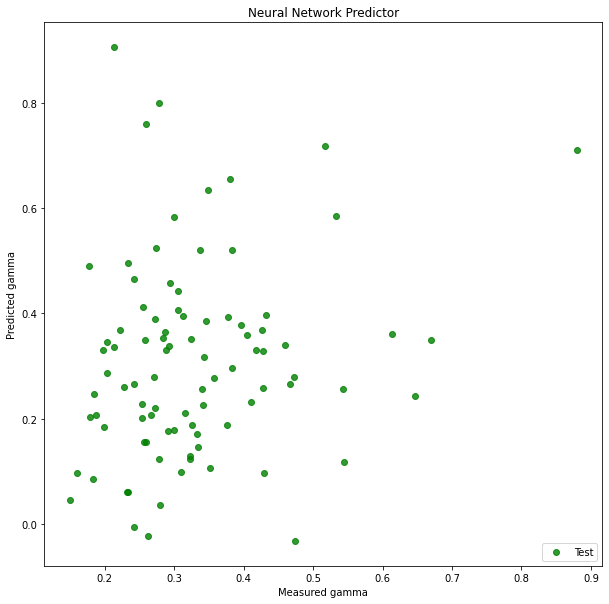

In [7]:
plt.figure()
plt.figure(figsize=(10,10))
#plt.scatter(y_train, model.predict(X_train), label = 'Train', c = 'blue')
plt.title('Neural Network Predictor')
plt.xlabel('Measured gamma')
plt.ylabel('Predicted gamma')
plt.scatter(y_test, model.predict(X_test), c = 'green', label = 'Test', alpha = 0.8)
plt.legend(loc = 4)
plt.savefig('Neural Network Predictor-500.png', dpi=300)
plt.show()

## 起码大的不会预测小，小的可能预测大

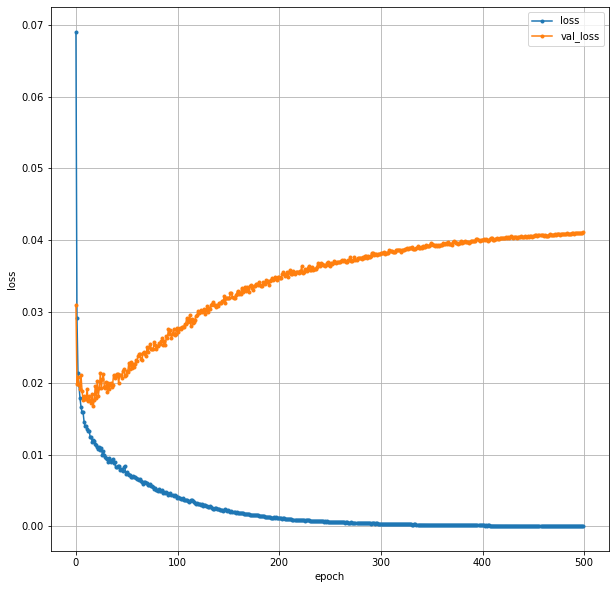

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.figure(figsize=(10,10))
plt.plot(range(epochs), loss, marker = '.', label = 'loss')
plt.plot(range(epochs), val_loss, marker = '.', label = 'val_loss')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

(array([ 8., 26., 61., 72., 52., 36., 31., 27., 16., 10.,  5.,  5.,  2.,
         1.,  3.,  1.,  1.,  1.,  0.,  2.]),
 array([0.11790387, 0.1610935 , 0.20428315, 0.2474728 , 0.29066244,
        0.33385208, 0.37704173, 0.42023137, 0.46342102, 0.50661063,
        0.5498003 , 0.5929899 , 0.63617957, 0.6793692 , 0.72255886,
        0.7657485 , 0.80893815, 0.8521278 , 0.89531744, 0.9385071 ,
        0.9816967 ], dtype=float32),
 <BarContainer object of 20 artists>)

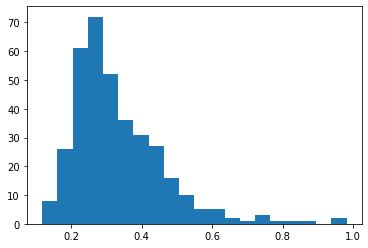

In [13]:
plt.hist(Y, bins=20)

In [18]:
Y=Y*45000

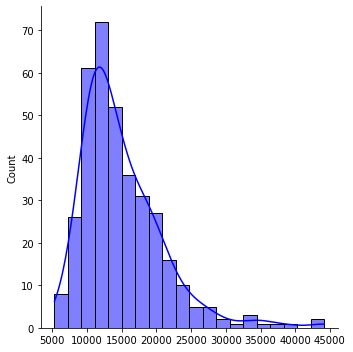

In [19]:
import seaborn as sns 
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.displot(Y,color="b",bins=20,kde=True)
plt.show()
